In [7]:
import os

path_for_dataset = "./books.csv.zip"

# Check if path is a file
if os.path.isfile(path_for_dataset):
    print(f"{path_for_dataset} is a file, not a directory.")
else:
    files = os.listdir(path_for_dataset)  # This would only work if it's a directory
    print(files)


./books.csv.zip is a file, not a directory.


In [8]:
import zipfile

# Define paths
zip_path = "./books.csv.zip"
extract_folder = "./books_dataset"

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Extracted files to: {extract_folder}")

# Now, list extracted files
extracted_files = os.listdir(extract_folder)
print("Extracted files:", extracted_files)

Extracted files to: ./books_dataset
Extracted files: ['books.csv']


In [10]:
import pandas as pd 
books = pd.read_csv(extract_folder + "/books.csv")
print(books.head())

          isbn13      isbn10           title subtitle  \
0  9780002005883  0002005883          Gilead      NaN   
1  9780002261982  0002261987    Spider's Web  A Novel   
2  9780006163831  0006163831    The One Tree      NaN   
3  9780006178736  0006178731  Rage of angels      NaN   
4  9780006280897  0006280897  The Four Loves      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
2             Stephen R. Donaldson               American fiction   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
2  http://books.google.com/books/content?id=OmQaw...   
3  http://books.go

In [11]:
print(books.describe())

             isbn13  published_year  average_rating    num_pages  \
count  6.810000e+03     6804.000000     6767.000000  6767.000000   
mean   9.780677e+12     1998.630364        3.933284   348.181026   
std    6.068911e+08       10.484257        0.331352   242.376783   
min    9.780002e+12     1853.000000        0.000000     0.000000   
25%    9.780330e+12     1996.000000        3.770000   208.000000   
50%    9.780553e+12     2002.000000        3.960000   304.000000   
75%    9.780810e+12     2005.000000        4.130000   420.000000   
max    9.789042e+12     2019.000000        5.000000  3342.000000   

       ratings_count  
count   6.767000e+03  
mean    2.106910e+04  
std     1.376207e+05  
min     0.000000e+00  
25%     1.590000e+02  
50%     1.018000e+03  
75%     5.992500e+03  
max     5.629932e+06  


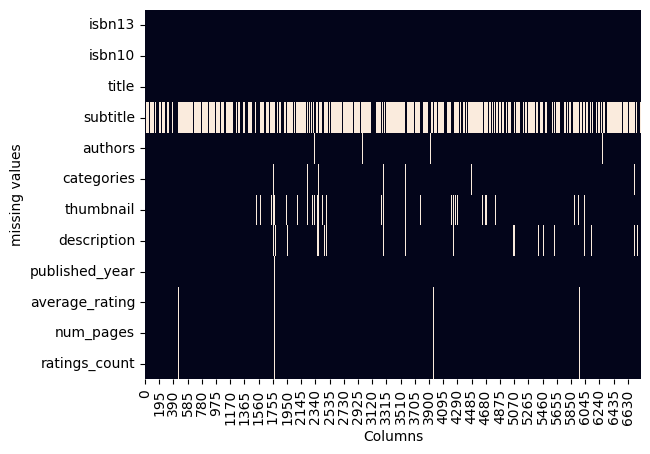

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.axes()
sns.heatmap(books.isnull().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("missing values")

plt.show()

In [ ]:
import numpy as np


books["missing_description"] = np.where(books["description"].isnull(), 1, 0)
books["age_of_book"] = 2025 - books["published_year"]

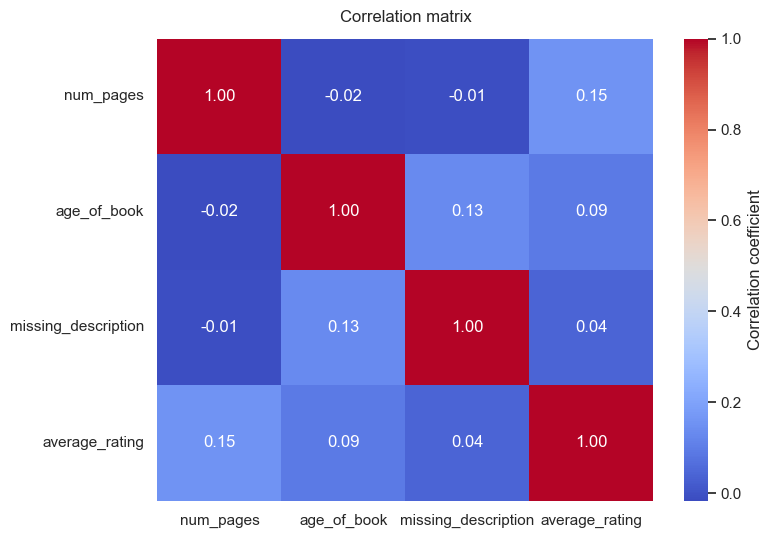

In [15]:
column_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

correlation_matrix = books[column_of_interest].corr(method = "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))

heatmap = sns.heatmap(correlation_matrix, annot=True, cmap = "coolwarm", fmt=".2f", cbar_kws={'label': 'Correlation coefficient'})
heatmap.set_title("Correlation matrix", fontdict={'fontsize':12}, pad=12)
plt.show()

In [16]:
books[(books["description"].isna()) |
      (books["average_rating"].isna()) |
      (books["num_pages"].isna()) |
      (books["published_year"].isna())
]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0,1,25.0
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002.0,4.14,186.0,56781.0,1,23.0
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,47.0
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0,1,72.0
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002.0,3.80,256.0,155.0,1,23.0
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym...,NaN,2006.0,0.00,254.0,0.0,1,19.0
6798,9787506435673,7506435675,Good Fight,NaN,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/books/content?id=xGPZA...,Presents the adventures of a new group of hero...,2007.0,NaN,NaN,NaN,0,18.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,32.0


In [18]:
books_missing = books[~(books["description"].isna()) &
      ~(books["average_rating"].isna()) &
      ~(books["num_pages"].isna()) &
      ~(books["published_year"].isna())
]   

print(books_missing.head())

          isbn13      isbn10           title subtitle  \
0  9780002005883  0002005883          Gilead      NaN   
1  9780002261982  0002261987    Spider's Web  A Novel   
2  9780006163831  0006163831    The One Tree      NaN   
3  9780006178736  0006178731  Rage of angels      NaN   
4  9780006280897  0006280897  The Four Loves      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
2             Stephen R. Donaldson               American fiction   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
2  http://books.google.com/books/content?id=OmQaw...   
3  http://books.go

In [23]:
# Get counts of each category
category_counts = books_missing["categories"].value_counts().reset_index()

# Rename the columns for clarity
category_counts.columns = ['category', 'count']

# Sort by count in descending order
category_counts_sorted = category_counts.sort_values("count", ascending=False)

# Print the result
print(category_counts_sorted)


                      category  count
0                      Fiction   2523
1             Juvenile Fiction    534
2    Biography & Autobiography    391
3                      History    258
4           Literary Criticism    164
..                         ...    ...
280                    Butlers      1
279                    Gardens      1
278                  Assassins      1
277             Married people      1
530    Indic fiction (English)      1

[531 rows x 2 columns]


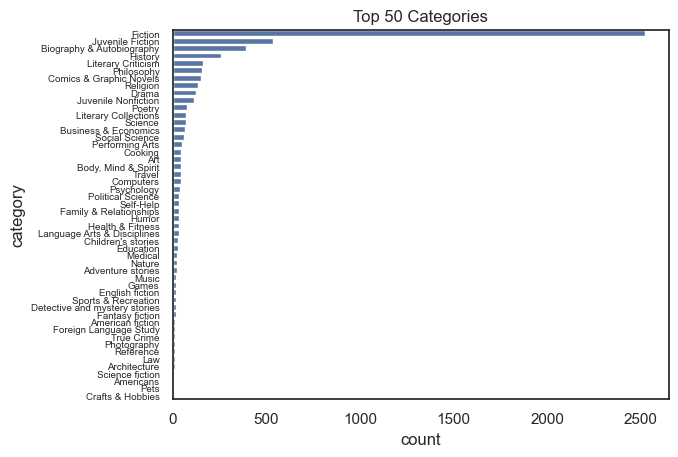

In [29]:
# Select the top 10 categories
top_n_categories = category_counts_sorted.head(50)

# Plot the barplot
sns.barplot(x="count", y="category", data=top_n_categories)

plt.yticks(fontsize=7)

plt.title("Top 50 Categories")
plt.show()


In [33]:
books_missing.loc[:, "words_in_description"] = books_missing["description"].str.split().str.len()

print(books_missing["words_in_description"].value_counts().reset_index())

     words_in_description  count
0                      36    152
1                      35    143
2                      38    140
3                      37    140
4                      33    140
..                    ...    ...
339                   314      1
340                   392      1
341                   308      1
342                   300      1
343                   288      1

[344 rows x 2 columns]


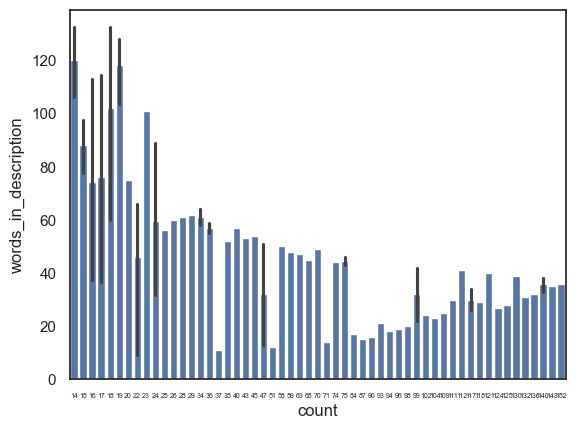

In [40]:
word_counts = books_missing["words_in_description"].value_counts().reset_index()

# Rename the columns for clarity
word_counts.columns = ['words_in_description', 'count']

# Create the barplot
sns.barplot(x="count", y="words_in_description", data=word_counts.head(100))
plt.xticks(fontsize=5)

plt.show()

In [42]:
books_missing.loc[books_missing["words_in_description"].between(1, 4), "description"].count()

55

In [44]:
books_missing.loc[books_missing["words_in_description"].between(11, 24), "description"]

2       Volume Two of Stephen Donaldson's acclaimed se...
10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
36      A magical and fantastic collection of early st...
38      Koko is Peter Straub's foray into the psycholo...
                              ...                        
6776    Raymond Chandler meets The Exorcist. Classic n...
6782    Displays one of America's leading physicist's ...
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 1153, dtype: object

In [46]:
books_missing.loc[books_missing["words_in_description"].between(25, 34), "description"]

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

In [49]:
books_missing_25_words = books_missing[books_missing["words_in_description"] >= 25]
print(books_missing_25_words)

             isbn13      isbn10  \
0     9780002005883  0002005883   
1     9780002261982  0002261987   
3     9780006178736  0006178731   
4     9780006280897  0006280897   
5     9780006280934  0006280935   
...             ...         ...   
6802  9788172235222  8172235224   
6803  9788173031014  8173031010   
6804  9788179921623  817992162X   
6805  9788185300535  8185300534   
6808  9789027712059  9027712050   

                                                  title  \
0                                                Gilead   
1                                          Spider's Web   
3                                        Rage of angels   
4                                        The Four Loves   
5                                   The Problem of Pain   
...                                                 ...   
6802                                  Mistaken Identity   
6803                                Journey to the East   
6804  The Monk Who Sold His Ferrari: A Fable Abo

In [51]:
books_missing_25_words.loc[:, "title_and_subtitle"] = (
    np.where(books_missing_25_words["subtitle"].isna(), books_missing_25_words["title"],
             books_missing_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis = 1))
)


In [52]:
books_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that: Talks with Sri Nisargadatta Maharaj


In [55]:
books_missing_25_words.loc[:, "tagged_description"] = books_missing_25_words[["isbn13","description"]].astype(str).agg(" ".join, axis = 1)

In [56]:
books_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity,9788172235222 On A Train Journey Home To North...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East,9788173031014 This book tells the tale of a ma...
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


In [57]:
(
    books_missing_25_words
    .drop(["subtitle", "missing_description", "age_of_book", "words_in_description"], axis = 1)
    .to_csv("books_cleaned.csv", index = False)
)